# Data Ninja - Secret places to open a restaurant
**Fernanda Oliveira**  
Data Scientist

## Table of contents
1. [Introduction](#introduction)
2. [Data acquisition](#data)
3. [Methodology](#methodology)
4. [Analysis](#Analysis)
5. [Results and Discussion](#results)
6. [Conclusion](#conclusion)

## 1. Introduction  <a name="introduction"></a>

### 1.1 Background

The city of Berlin is well known to be a cosmopolitan city where you can find people from all around the world. Berlin offers a very wide commercial variety, especially in the area of gastronomy. The trend that comes to stay, are Asian restaurants, particularly Japanese restaurants. Although there are a lot of them spread in the city, there are new ones opening all the time. Therefore to analyze locations, types, and the number of these restaurants is a plus for those who want to open a new restaurant in the city.

### 1.2 Problem

Searching an optimal location to open a Japanese restaurant in the city of Berlin can be challenging. One could think that the better location for it should be at a place where there is no Japanese restaurant. But the problem is that perhaps most of the interested customers instead of going to an isolated neighborhood, prefer to go to a popular neighborhood, where there are more options and also there is movement of people. At the same time that the concurrence will be big in these regions, the flux of interested customers in this specific region will be relevant as well. Many people, for example, go on the weekends to a specific Japanese restaurant and when they arrive, there is a large line waiting for them. This usually happens because it is also a new trend in Berlin, in some popular restaurants, not to have an option to make a reservation. The good news is that perhaps some of the customers, those who do not want wait too long in line, might want to search for similar options in the neighborhood. 

### 1.3 Interest

This project is ideal for a person or a branch that is interested in opening a Japanese restaurant. 

First, I will import the libraries necessary for this project.

In [1]:
#import geocoder
# from geopy.geocoders import Nominatim
# !pip install pygeocoder
# from pygeocoder import Geocoder

In [2]:
import numpy as np # library to handle data in a vectorized manner

In [3]:
import pandas as pd # library for data analysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files


In [4]:
#!conda install -c conda-forge geopy --yes 
#from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

In [5]:
import requests # library to handle requests

In [6]:
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

In [7]:
#!pip install seaborn
import seaborn as sns

In [8]:
import matplotlib.pyplot as plt
from matplotlib.ticker import EngFormatter  
from matplotlib.ticker import PercentFormatter  

In [9]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

In [10]:
#!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

In [11]:
#print('Libraries imported.')

## 2. Data acquisition <a name="Data source "></a>

### 2.1 Data source 

The data and tools that I will use are the following:

* **Foursquare API** to select the number of restaurants and their location in some neighborhoods of Berlin
* **Geocoder** to get the latitudes and longitudes of places to rent, together with information from https://www.sebuyo.com

### 2.2 Feature selection

* I will first create a dataset thought the Foursquare API, exploring several types of venues, such as ID, name, category (Japanese restaurant), latitude, longitude, neighborhood, and distance (in meters) to Charllotenburg, a borough of Berlin, where is very famous to have Japanese restaurants. Then I will apply again the search using Foursquare API for public transportation categories, city train, and metro in Berlin. 

* I will save the data collected using Foursquare API to a CSV file and then read them with `Pandas`.

* Then, I will create another dataset that has information about available places to rent in Berlin. First, I will create the features "postal codes" and "prices" of these places and then with the help of Geocoder, I will get the latitude, longitude features. Then, I will save to a file CSV and read it with `Pandas`.

In [12]:
#CLIENT_ID = 'myclientID' # your Foursquare ID
#CLIENT_SECRET = 'myclientsecret' # your Foursquare Secret
# VERSION = '20180605' # Foursquare API version

# print('Your credentails:')
# print('CLIENT_ID: ' + CLIENT_ID)
# print('CLIENT_SECRET:' + CLIENT_SECRET)

In [13]:
# define Berlin's geolocation coordinates (center of Charllotenburg)
berlin_latitude = 52.50333132 #52.520008
berlin_longitude = 13.308665432 #13.404954

In [14]:
# type your answer here
# LIMIT = 500 # limit of number of venues returned by Foursquare API
# radius = 15000 # define radius
# category = '4bf58dd8d48988d111941735' # Japanese restaurants 
# #category = '4bf58dd8d48988d1fc931735' # S-Bahnhof
# #category = '4bf58dd8d48988d1fd931735' #U-Bahnhof

In [15]:
# url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&categoryId={}&radius={}&limit={}'.format(
#  CLIENT_ID, 
#    CLIENT_SECRET, 
#     VERSION, 
#    berlin_latitude, 
#    berlin_longitude, 
#     category,
#       radius, 
#     LIMIT)

In [16]:
# results = requests.get(url).json()
# results.values();
# print(results)

In [17]:
# # function that extracts the category of the venue
# def get_category_type(row):
#     try:
#         categories_list = row['categories']
#     except:
#         categories_list = row['venue.categories']
        
#     if len(categories_list) == 0:
#         return None
#     else:
#         return categories_list[0]['name']

In [18]:
# venues = results['response']['groups'][0]['items']
# venues_neighborhood = [results['response']['groups'][0]['items'][n]['venue']['location']['formattedAddress'] for n in range(len(venues))]  
# venues_distance = [results['response']['groups'][0]['items'][n]['venue']['location']['distance'] for n in range(len(venues))]  
# nearby_venues = json_normalize(venues) # flatten JSON

# # filter columns
# filtered_columns = ['venue.id','venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
# nearby_venues =nearby_venues.loc[:, filtered_columns]

# # filter the category for each row
# nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# # clean columns
# nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

# [venues_neighborhood[k][0] for k in range(len(venues_neighborhood))]

# #nearby_venues['neighborhood'] = venues_neighborhood[0][0]
# nearby_venues['neighborhood'] =  [venues_neighborhood[k][0] for k in range(len(venues_neighborhood))]
# nearby_venues['distance [m]'] = venues_distance

# df = nearby_venues
# df.head()

#import os

#outname = 'japanesecategory.csv'

#outdir = '/'
#if not os.path.exists(outdir):
 #   os.mkdir(outdir)

#fullname = os.path.join(outdir, outname)    

#df.to_csv(fullname)

In [19]:
df_jc = pd.read_csv("japanesecategory.csv")
df_jc.drop(['Unnamed: 0'], axis=1, inplace=True);
df_jc.drop(['distance [m]'], axis=1, inplace=True);
df_jc.head()

,id,name,categories,lat,lng,neighborhood
0,55f9a48e498ee737a1893058,Heno Heno,Japanese Restaurant,52.503964,13.315578,Wielandstr. 37
1,4bbe353b9474c9b63e41d9b6,Kushinoya,Japanese Restaurant,52.505372,13.319982,Bleibtreustr. 6
2,570b97c4498e2c6e7c5eb991,Smart Deli,Japanese Restaurant,52.528094,13.389060,Novalisstr. 2
3,57c9e26a498ed1dcbbd0b461,Sticks'n'Sushi,Japanese Restaurant,52.502020,13.365064,Potsdamer Str. 85
4,4c0fde34ce57c928f7f580d2,Green Tea Café MAMECHA,Japanese Restaurant,52.527284,13.406305,Mulackstr. 33 (Rückerstr.)


In [20]:
df_s = pd.read_csv("sbahncategory.csv")
df_s.drop(['Unnamed: 0'], axis=1, inplace=True);
df_s.drop(['distance [m]'], axis=1, inplace=True);
df_s.head()

,id,name,categories,lat,lng,neighborhood
0,4a1c8506f964a520457b1fe3,Berlin Hauptbahnhof,Light Rail Station,52.525220,13.369369,Europaplatz 1 (Washingtonplatz)
1,4af5f0c7f964a52020ff21e3,Bahnhof Berlin Friedrichstraße,Light Rail Station,52.520284,13.387063,Georgenstr. 14/17
2,4b05bf38f964a5204ce222e3,Bahnhof Berlin Potsdamer Platz,Light Rail Station,52.509723,13.376597,Potsdamer Platz (Potsdamer Str.)
3,4adcda91f964a520ba4b21e3,Bahnhof Berlin Zoologischer Garten,Light Rail Station,52.506642,13.332513,Hardenbergplatz 13
4,4b01859ef964a520174322e3,S Savignyplatz,Light Rail Station,52.505093,13.319847,Bleibtreustr. 49


In [21]:
df_u = pd.read_csv("ubahn_data.csv")
df_u.drop(['Unnamed: 0'], axis=1, inplace=True);
df_u.drop(['distance [m]'], axis=1, inplace=True);
df_u.head()

,id,name,categories,lat,lng,neighborhood
0,4bfb2cf765fbc9b66f23916c,U Rehberge,Metro Station,52.555570,13.343412,Müllerstr. (Dubliner Str.)
1,4b538a1af964a52043a127e3,U Wilmersdorfer Straße,Metro Station,52.506312,13.306770,Wilmersdorfer Str. (Kantstr.)
2,4b5de986f964a520387329e3,U Adenauerplatz,Metro Station,52.499950,13.307203,Adenauerplatz (Kurfürstendamm)
3,4b47845cf964a5209e3426e3,U Güntzelstraße,Metro Station,52.490989,13.330868,Bundesallee (Güntzelstr.)
4,4b2a3edbf964a52076a624e3,U Deutsche Oper,Metro Station,52.511193,13.311905,Bismarckstr. (Krumme Str./Weimarer Str.)


Using the website https://www.sebuyo.com I made a search of prices and code postal of the avaiable places to rent in Berlin

In [22]:
df_rent = pd.DataFrame({'Postcode': [10247, 10777, 10713, 10719, 12359, 12057, 10785, 12043, 13595, 12053, 10435, 10119, 10245, 13597, 12347, 10115, 10717, 13585, 12057, 16727],'Price': [2400, 1142.36, 3269, 5900, 300, 400, 3900, 10000, 0, 1600, 2500, 3000, 1095, 0, 1000, 0, 2700, 570, 400, 0]})

In [23]:
df_rent.head()

,Postcode,Price
0,10247,2400.00
1,10777,1142.36
2,10713,3269.00
3,10719,5900.00
4,12359,300.00


Using Geocoder I found the respective latitudes and longitudes using the information of the code postal. 

In [24]:
# def  get_latlng(postal_code):
#     latlng_coords = None
#     while(latlng_coords is None):
#         g = geocoder.arcgis('{}, Berlin, Berlin'.format(postal_code))
#         latlng_coords = g.latlng
#     return latlng_coords

In [25]:
# codepost = df_rent['Postcode']
# coords = [get_latlng(postal_code) 
#          for postal_code 
#          in codepost.tolist()]

In [26]:
# df_coords = pd.DataFrame(coords, columns = ['Latitude', 'Longitude'])
# df_rent['Latitude'] = df_coords['Latitude']
# df_rent['Longitude'] = df_coords['Longitude']

Here I saved the dataframe df_rent to a file and then I read with pandas.

In [27]:
df_r = pd.read_csv("rent_data.csv")
df_r.drop(['Unnamed: 0'], axis=1, inplace=True);
df_r.head()

,Postcode,Price,Latitude,Longitude
0,12683,2900.00,52.503731,13.559540
1,10247,2400.00,52.516340,13.463990
2,10777,1142.36,52.497685,13.342285
3,10713,3269.00,52.485240,13.311870
4,10719,5900.00,52.498245,13.327140


Here we will understand more our data collection and we will apply some descriptive statistics to answer to following answers:

* How many restaurants exists?
* How many avaiable places to rent exist?
* How many categories exist in each dataset?

In [28]:
df_jc['categories'].describe()

count                     100
unique                     10
top       Japanese Restaurant
freq                       63
Name: categories, dtype: object

In [29]:
df_jc.categories.unique()

array(['Japanese Restaurant', 'Vietnamese Restaurant', 'Sushi Restaurant',
       'Ramen Restaurant', 'Asian Restaurant', 'Chinese Restaurant',
       'Café', 'Vegetarian / Vegan Restaurant', 'Korean Restaurant',
       'Cocktail Bar'], dtype=object)

In [30]:
df_r.count()

Postcode     21
Price        21
Latitude     21
Longitude    21
dtype: int64

In [31]:
#save as a new df to insert a new column:
#df_jc.to_csv('df_jc_kc.csv', index=False)     #index=False avoid to create a column 'Unnamed:0'

In [32]:
#df_jc_kc = pd.read_csv('df_jc_kc.csv')
#df_jc_kc.head()

In [33]:
#Adds a new column 
df_jc['categories_simplified'] = df_jc['categories']
df_jc.head(3)

,id,name,categories,lat,lng,neighborhood,categories_simplified
0,55f9a48e498ee737a1893058,Heno Heno,Japanese Restaurant,52.503964,13.315578,Wielandstr. 37,Japanese Restaurant
1,4bbe353b9474c9b63e41d9b6,Kushinoya,Japanese Restaurant,52.505372,13.319982,Bleibtreustr. 6,Japanese Restaurant
2,570b97c4498e2c6e7c5eb991,Smart Deli,Japanese Restaurant,52.528094,13.389060,Novalisstr. 2,Japanese Restaurant


In [34]:
#renames values of categories to shorter names
df_jc = df_jc.replace({'categories_simplified': {'Japanese Restaurant': 'Japanese', 
                                                 'Vietnamese Restaurant': 'Vietnamese',
                                                 'Sushi Restaurant': 'Sushi', 
                                                 'Ramen Restaurant': 'Ramen',
                                                 'Asian Restaurant': 'Asian', 
                                                 'Chinese Restaurant': 'Chinese',
                                                 'Vegetarian / Vegan Restaurant': 'Veget/Vegan',
                                                 'Korean Restaurant': 'Korean'}})

df_jc.tail(20)

,id,name,categories,lat,lng,neighborhood,categories_simplified
80,4fddeb7be4b0d331696751c5,RICE IN,Sushi Restaurant,52.510948,13.462076,Grünberger Str. 88,Sushi
81,4af7f638f964a520980a22e3,Makoto,Japanese Restaurant,52.526751,13.407666,Alte Schönhauser Str. 13 (Mulackstr.),Japanese
82,59afdac08134880efbedf20e,Eden Restaurant,Vietnamese Restaurant,52.522046,13.404751,Rosenstr. 19 (Rochstr.),Vietnamese
83,4b43ceddf964a52099ea25e3,rice & more,Asian Restaurant,52.434615,13.378290,Großbeerenstr. 51,Asian
84,4ba3bdbff964a520485a38e3,Akito Sushi Bar,Japanese Restaurant,52.523833,13.387049,Reinhardtstr. 6,Japanese
85,5c1b7f03f96b2c002c8ca1fc,Secret Garden Berlin,Vegetarian / Vegan Restaurant,52.507605,13.449941,Wahrschauerstr. 32 (Helsingforser Str.),Veget/Vegan
86,4c29ab0d360cef3bc34fbedc,Sy,Sushi Restaurant,52.537891,13.206676,Breite Straße 33,Sushi
87,4b867817f964a520638b31e3,Aki Tatsu Sushi & More,Japanese Restaurant,52.497055,13.354674,Winterfeldtstr. 40,Japanese
88,540d8a24498e0ff16065fec9,Seoulkitchen Korean BBQ & Sushi,Korean Restaurant,52.503595,13.447352,Warschauer Str. 46 (Mühlenstr.),Korean
89,537dd7b4498e956dc8576472,Akito Sushi Bar,Sushi Restaurant,52.530115,13.383577,Chausseestr. 116,Sushi


In [35]:
df_jc.categories_simplified.unique()

array(['Japanese', 'Vietnamese', 'Sushi', 'Ramen', 'Asian', 'Chinese',
       'Café', 'Veget/Vegan', 'Korean', 'Cocktail Bar'], dtype=object)

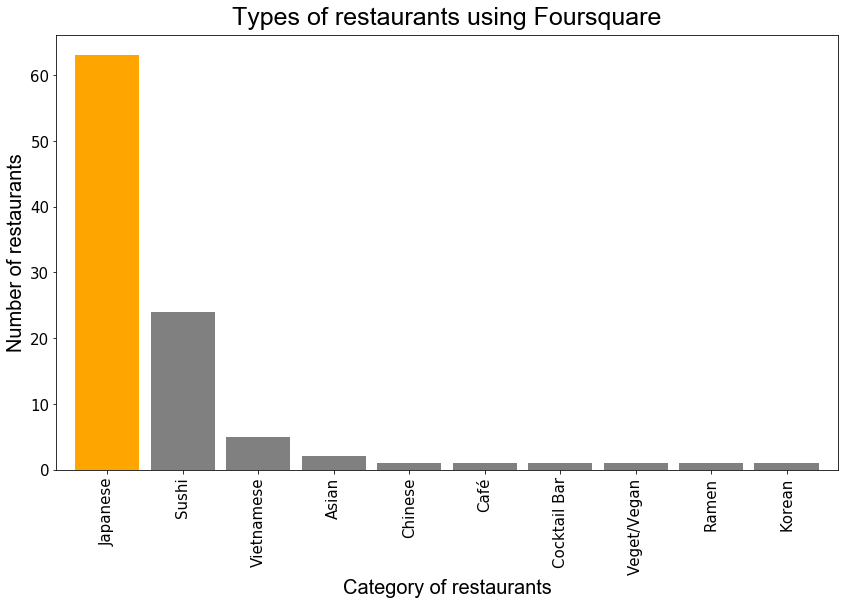

In [36]:
#ax = df_jc['categories'].value_counts().plot(kind='bar', figsize=(14,8), title="Japanese category venue")
#ax.set_xlabel("Category of restaurants")
#ax.set_ylabel("Frequency")

#Using Pandas
ax = df_jc['categories_simplified'].value_counts().plot(kind='bar', 
                                                   figsize=(14,8), 
                                                   width=.85,
                                                   color=['orange','gray','gray','gray',
                                                          'gray','gray', 'gray','gray',
                                                          'gray','gray'])                                         
                                                                                       
ax.set_title("Types of restaurants using Foursquare", fontname='Arial', fontsize=25, y=1.01)
ax.set_xlabel("Category of restaurants", fontname="Arial", fontsize=20)
ax.set_ylabel("Number of restaurants", fontname="Arial", fontsize=20) 
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(15) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(15)


## 3. Methodology

The goal of this project is to search for locations where the neighborhood is surrounded by Japanese restaurants. Then I will apply  **K-means Clustering** to make segmentations of the types of Japanese restaurants. After that, research about the prices to rent a place for opening a restaurant will be made. In addition, the optimal location should be accessible by public transportation. In the end, the focus will be to find locations that have a distance of approximately 300 m from Japanese restaurants that already exist and near public transportations. 
 Based on the goal of this project, I will describe below, what is needed to perform this search and which data sources will be used:
 
* number of existing Japanese restaurants
* prices and locations of places in Berlin to open a restaurant
* segmentation of types of Japanese restaurants in a neighborhood
* distance of the available places to rent to the Japanese restaurants that already exist and to public transportation.

K-means Clustering is a simple and popular unsupervised algorithm that can be used to make segmentation. Segmentation is a practice of divide a feature into groups with similar characteristics. Therefore one can get some insights from the characteristics of the data. 

First, I will start applying the **One-hot Encoding** function to convert categorical variations to numerical ones. The results 0 indicates non-existent while 1 indicates existent.

In [37]:
# one hot encoding for Japanese category
#berlin_onehot = pd.get_dummies(df_jc[['categories']], prefix="", prefix_sep="")
berlin_onehot = pd.get_dummies(df_jc[['categories']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
#berlin_onehot['neighborhood'] = df_jc['neighborhood'] 
berlin_onehot['neighborhood'] = df_jc['neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [berlin_onehot.columns[-1]] + list(berlin_onehot.columns[:-1])
berlin_onehot = berlin_onehot[fixed_columns]
berlin_grouped = berlin_onehot.groupby('neighborhood').mean().reset_index()

In [38]:
berlin_onehot.head()

,neighborhood,Asian Restaurant,Café,Chinese Restaurant,Cocktail Bar,Japanese Restaurant,Korean Restaurant,Ramen Restaurant,Sushi Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,Wielandstr. 37,0,0,0,0,1,0,0,0,0,0
1,Bleibtreustr. 6,0,0,0,0,1,0,0,0,0,0
2,Novalisstr. 2,0,0,0,0,1,0,0,0,0,0
3,Potsdamer Str. 85,0,0,0,0,1,0,0,0,0,0
4,Mulackstr. 33 (Rückerstr.),0,0,0,0,1,0,0,0,0,0


In [39]:
berlin_grouped = berlin_onehot.groupby('neighborhood').mean().reset_index()

Now I will create a dataset in `Pandas`. For this, I will use a function to sort the venues in descending order.

In [40]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]
    

Here I will create a new dataset and display the top 7 venues for each neighborhood.

In [41]:
num_top_venues = 7

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))  
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))  

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['neighborhood'] = berlin_grouped['neighborhood']

for ind in np.arange(berlin_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(berlin_grouped.iloc[ind, :], num_top_venues)

In [42]:
neighborhoods_venues_sorted.head()

,neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
0,Ahornstr. 32,Sushi Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Ramen Restaurant,Korean Restaurant,Japanese Restaurant,Cocktail Bar
1,Albrechtstr. 131,Sushi Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Ramen Restaurant,Korean Restaurant,Japanese Restaurant,Cocktail Bar
2,Alte Schönhauser Str. 13 (Mulackstr.),Japanese Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Ramen Restaurant,Korean Restaurant,Cocktail Bar
3,Alte Schönhauser Str. 7-8,Japanese Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Ramen Restaurant,Korean Restaurant,Cocktail Bar
4,Bergmannstraße 93,Japanese Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Ramen Restaurant,Korean Restaurant,Cocktail Bar


### 3.1 Cluster Neighborhoods

I will run *k*-means to cluster the neighborhood into 5 clusters.

In [43]:
# set number of clusters
kclusters = 5

berlin_grouped_clustering = berlin_grouped.drop('neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(berlin_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 2, 2, 2, 1, 2, 2, 2, 2], dtype=int32)

In [44]:
kmeans_cluster_centers = kmeans.cluster_centers_
kmeans_cluster_centers.shape

(5, 10)

In [45]:
neighborhoods_venues_sorted.insert(0,'Cluster Labels', kmeans.labels_)

In [46]:
neighborhoods_venues_sorted.head()

,Cluster Labels,neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
0,0,Ahornstr. 32,Sushi Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Ramen Restaurant,Korean Restaurant,Japanese Restaurant,Cocktail Bar
1,0,Albrechtstr. 131,Sushi Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Ramen Restaurant,Korean Restaurant,Japanese Restaurant,Cocktail Bar
2,2,Alte Schönhauser Str. 13 (Mulackstr.),Japanese Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Ramen Restaurant,Korean Restaurant,Cocktail Bar
3,2,Alte Schönhauser Str. 7-8,Japanese Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Ramen Restaurant,Korean Restaurant,Cocktail Bar
4,2,Bergmannstraße 93,Japanese Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Ramen Restaurant,Korean Restaurant,Cocktail Bar


In [47]:
df_jc.head()

,id,name,categories,lat,lng,neighborhood,categories_simplified
0,55f9a48e498ee737a1893058,Heno Heno,Japanese Restaurant,52.503964,13.315578,Wielandstr. 37,Japanese
1,4bbe353b9474c9b63e41d9b6,Kushinoya,Japanese Restaurant,52.505372,13.319982,Bleibtreustr. 6,Japanese
2,570b97c4498e2c6e7c5eb991,Smart Deli,Japanese Restaurant,52.528094,13.389060,Novalisstr. 2,Japanese
3,57c9e26a498ed1dcbbd0b461,Sticks'n'Sushi,Japanese Restaurant,52.502020,13.365064,Potsdamer Str. 85,Japanese
4,4c0fde34ce57c928f7f580d2,Green Tea Café MAMECHA,Japanese Restaurant,52.527284,13.406305,Mulackstr. 33 (Rückerstr.),Japanese


In [48]:
# add clustering labels
#neighborhoods_venues_sorted.insert(0,'Cluster Labels', kmeans.labels_)

berlin_merged = df_jc

# merge berlin_grouped with berlin_data to add latitude/longitude for each neighborhood
berlin_merged = berlin_merged.join(neighborhoods_venues_sorted.set_index('neighborhood'), on='neighborhood')
berlin_merged.head() # check the last columns!

,id,name,categories,lat,lng,neighborhood,categories_simplified,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
0,55f9a48e498ee737a1893058,Heno Heno,Japanese Restaurant,52.503964,13.315578,Wielandstr. 37,Japanese,2,Japanese Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Ramen Restaurant,Korean Restaurant,Cocktail Bar
1,4bbe353b9474c9b63e41d9b6,Kushinoya,Japanese Restaurant,52.505372,13.319982,Bleibtreustr. 6,Japanese,2,Japanese Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Ramen Restaurant,Korean Restaurant,Cocktail Bar
2,570b97c4498e2c6e7c5eb991,Smart Deli,Japanese Restaurant,52.528094,13.389060,Novalisstr. 2,Japanese,2,Japanese Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Ramen Restaurant,Korean Restaurant,Cocktail Bar
3,57c9e26a498ed1dcbbd0b461,Sticks'n'Sushi,Japanese Restaurant,52.502020,13.365064,Potsdamer Str. 85,Japanese,2,Japanese Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Ramen Restaurant,Korean Restaurant,Cocktail Bar
4,4c0fde34ce57c928f7f580d2,Green Tea Café MAMECHA,Japanese Restaurant,52.527284,13.406305,Mulackstr. 33 (Rückerstr.),Japanese,2,Japanese Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Ramen Restaurant,Korean Restaurant,Cocktail Bar


## 4. Analysis  <a name="Analysis"></a>

Now that we applied the **K-mean Clustering**, I will analyze each cluster and create datasets for each of them. 

### Cluster 0

In [49]:
berlin_merged.loc[berlin_merged['Cluster Labels'] == 0, berlin_merged.columns[[0] + list(range(5, berlin_merged.shape[1]))]].head()

,id,neighborhood,categories_simplified,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
28,4b3ba703f964a5200a7825e3,Kottbusser Damm 102,Sushi,0,Sushi Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Ramen Restaurant,Korean Restaurant,Japanese Restaurant,Cocktail Bar
48,4d358f7f2c76a1438bd18fc7,Goethestr. 37-38,Sushi,0,Sushi Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Ramen Restaurant,Korean Restaurant,Japanese Restaurant,Cocktail Bar
53,4adcda88f964a520724921e3,Albrechtstr. 131,Sushi,0,Sushi Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Ramen Restaurant,Korean Restaurant,Japanese Restaurant,Cocktail Bar
54,5571f00e498e055a7d77700d,Dahlmannstr. 14,Sushi,0,Sushi Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Ramen Restaurant,Korean Restaurant,Japanese Restaurant,Cocktail Bar
55,4c84d8ab51ada1cd472a3210,Wilmersdorfer Str. 22 (Thrasoltstr.),Sushi,0,Sushi Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Ramen Restaurant,Korean Restaurant,Japanese Restaurant,Cocktail Bar


In [50]:
berlin_merged['categories'].loc[berlin_merged['Cluster Labels'] == 0].count()

24

In [51]:
berlin_merged.loc[berlin_merged['Cluster Labels'] == 0, berlin_merged.columns[[0] + list(range(5, berlin_merged.shape[1]))]].head()

,id,neighborhood,categories_simplified,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
28,4b3ba703f964a5200a7825e3,Kottbusser Damm 102,Sushi,0,Sushi Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Ramen Restaurant,Korean Restaurant,Japanese Restaurant,Cocktail Bar
48,4d358f7f2c76a1438bd18fc7,Goethestr. 37-38,Sushi,0,Sushi Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Ramen Restaurant,Korean Restaurant,Japanese Restaurant,Cocktail Bar
53,4adcda88f964a520724921e3,Albrechtstr. 131,Sushi,0,Sushi Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Ramen Restaurant,Korean Restaurant,Japanese Restaurant,Cocktail Bar
54,5571f00e498e055a7d77700d,Dahlmannstr. 14,Sushi,0,Sushi Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Ramen Restaurant,Korean Restaurant,Japanese Restaurant,Cocktail Bar
55,4c84d8ab51ada1cd472a3210,Wilmersdorfer Str. 22 (Thrasoltstr.),Sushi,0,Sushi Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Ramen Restaurant,Korean Restaurant,Japanese Restaurant,Cocktail Bar


### Cluster 1

In [52]:
clusterone = berlin_merged.loc[berlin_merged['Cluster Labels'] == 1, berlin_merged.columns[[1] + list(range(5, berlin_merged.shape[1]))]]
berlin_merged['categories'].loc[berlin_merged['Cluster Labels'] == 1].count()

7

In [53]:
berlin_merged.loc[berlin_merged['Cluster Labels'] == 1, berlin_merged.columns[[1] + list(range(5, berlin_merged.shape[1]))]]

,name,neighborhood,categories_simplified,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
26,KUCHI Mitte,Gipsstr. 3 (Auguststr.),Japanese,1,Ramen Restaurant,Japanese Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Korean Restaurant,Cocktail Bar
39,Cocolo Ramen,Gipsstr. 3 (Auguststr.),Ramen,1,Ramen Restaurant,Japanese Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Korean Restaurant,Cocktail Bar
68,Asia Land,Berlin,Chinese,1,Chinese Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Ramen Restaurant,Korean Restaurant,Japanese Restaurant
72,Café Komine,Welserstr. 13-15 (Geisbeegerstr.),Café,1,Café,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Ramen Restaurant,Korean Restaurant,Japanese Restaurant
85,Secret Garden Berlin,Wahrschauerstr. 32 (Helsingforser Str.),Veget/Vegan,1,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Sushi Restaurant,Ramen Restaurant,Korean Restaurant,Japanese Restaurant,Cocktail Bar
88,Seoulkitchen Korean BBQ & Sushi,Warschauer Str. 46 (Mühlenstr.),Korean,1,Korean Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Ramen Restaurant,Japanese Restaurant,Cocktail Bar
98,Bar Tausend,Schiffbauerdamm 11,Cocktail Bar,1,Cocktail Bar,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Ramen Restaurant,Korean Restaurant,Japanese Restaurant


### Cluster 2

In [54]:
clustertwo = berlin_merged.loc[berlin_merged['Cluster Labels'] == 2, berlin_merged.columns[[1] + list(range(5, berlin_merged.shape[1]))]]

In [55]:
berlin_merged['categories'].loc[berlin_merged['Cluster Labels'] == 2].count()

62

In [56]:
berlin_merged.loc[berlin_merged['Cluster Labels'] == 2, berlin_merged.columns[[1] + list(range(5, berlin_merged.shape[1]))]].head()

,name,neighborhood,categories_simplified,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
0,Heno Heno,Wielandstr. 37,Japanese,2,Japanese Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Ramen Restaurant,Korean Restaurant,Cocktail Bar
1,Kushinoya,Bleibtreustr. 6,Japanese,2,Japanese Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Ramen Restaurant,Korean Restaurant,Cocktail Bar
2,Smart Deli,Novalisstr. 2,Japanese,2,Japanese Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Ramen Restaurant,Korean Restaurant,Cocktail Bar
3,Sticks'n'Sushi,Potsdamer Str. 85,Japanese,2,Japanese Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Ramen Restaurant,Korean Restaurant,Cocktail Bar
4,Green Tea Café MAMECHA,Mulackstr. 33 (Rückerstr.),Japanese,2,Japanese Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Ramen Restaurant,Korean Restaurant,Cocktail Bar


### Cluster 3

In [57]:
berlin_merged.loc[berlin_merged['Cluster Labels'] == 3, berlin_merged.columns[[1] + list(range(5, berlin_merged.shape[1]))]]

,name,neighborhood,categories_simplified,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
27,DUDU,Torstr. 134,Vietnamese,3,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Ramen Restaurant,Korean Restaurant,Japanese Restaurant,Cocktail Bar
61,Sy Restaurant,Kantstr. 54,Vietnamese,3,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Ramen Restaurant,Korean Restaurant,Japanese Restaurant,Cocktail Bar
69,Mama Cook,Hedemannstraße 10,Vietnamese,3,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Ramen Restaurant,Korean Restaurant,Japanese Restaurant,Cocktail Bar
82,Eden Restaurant,Rosenstr. 19 (Rochstr.),Vietnamese,3,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Ramen Restaurant,Korean Restaurant,Japanese Restaurant,Cocktail Bar
90,Minh-Trang,Kantstr. 67 (Kaiser-Friedrich-Str.),Vietnamese,3,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Ramen Restaurant,Korean Restaurant,Japanese Restaurant,Cocktail Bar


In [58]:
berlin_merged['categories'].loc[berlin_merged['Cluster Labels'] == 3].count()

5

In [59]:
berlin_merged.loc[berlin_merged['Cluster Labels'] == 3, berlin_merged.columns[[1] + list(range(5, berlin_merged.shape[1]))]]

,name,neighborhood,categories_simplified,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
27,DUDU,Torstr. 134,Vietnamese,3,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Ramen Restaurant,Korean Restaurant,Japanese Restaurant,Cocktail Bar
61,Sy Restaurant,Kantstr. 54,Vietnamese,3,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Ramen Restaurant,Korean Restaurant,Japanese Restaurant,Cocktail Bar
69,Mama Cook,Hedemannstraße 10,Vietnamese,3,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Ramen Restaurant,Korean Restaurant,Japanese Restaurant,Cocktail Bar
82,Eden Restaurant,Rosenstr. 19 (Rochstr.),Vietnamese,3,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Ramen Restaurant,Korean Restaurant,Japanese Restaurant,Cocktail Bar
90,Minh-Trang,Kantstr. 67 (Kaiser-Friedrich-Str.),Vietnamese,3,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Ramen Restaurant,Korean Restaurant,Japanese Restaurant,Cocktail Bar


### Cluster 4

In [60]:
berlin_merged.loc[berlin_merged['Cluster Labels'] == 4, berlin_merged.columns[[1] + list(range(5, berlin_merged.shape[1]))]]

,name,neighborhood,categories_simplified,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
44,893 Ryōtei,Kantstr. 135,Asian,4,Asian Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Ramen Restaurant,Korean Restaurant,Japanese Restaurant
83,rice & more,Großbeerenstr. 51,Asian,4,Asian Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Ramen Restaurant,Korean Restaurant,Japanese Restaurant


In [61]:
berlin_merged['categories'].loc[berlin_merged['Cluster Labels'] == 4].count()

2

In [62]:
berlin_merged.loc[berlin_merged['Cluster Labels'] == 4, berlin_merged.columns[[1] + list(range(5, berlin_merged.shape[1]))]]

,name,neighborhood,categories_simplified,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
44,893 Ryōtei,Kantstr. 135,Asian,4,Asian Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Ramen Restaurant,Korean Restaurant,Japanese Restaurant
83,rice & more,Großbeerenstr. 51,Asian,4,Asian Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Ramen Restaurant,Korean Restaurant,Japanese Restaurant


Here we will calculate the score of the available places to rent to the Japanese restaurants that already exists and to the public transportation.

In [63]:
#!pip install shapely
import shapely.geometry

#!pip install pyproj
import pyproj

import math

def lonlat_to_xy(lon, lat):
    proj_latlon = pyproj.Proj(proj='latlong',datum='WGS84')
    proj_xy = pyproj.Proj(proj="utm", zone=33, datum='WGS84')
    xy = pyproj.transform(proj_latlon, proj_xy, lon, lat)
    return xy[0], xy[1]

def xy_to_lonlat(x, y):
    proj_latlon = pyproj.Proj(proj='latlong',datum='WGS84')
    proj_xy = pyproj.Proj(proj="utm", zone=33, datum='WGS84')
    lonlat = pyproj.transform(proj_xy, proj_latlon, x, y)
    return lonlat[0], lonlat[1]

def calc_xy_distance(x1, y1, x2, y2):
    dx = x2 - x1
    dy = y2 - y1
    return math.sqrt(dx*dx + dy*dy)

In [64]:
X = list(berlin_merged['lat']);
Y = list(berlin_merged['lng']);
x, y = lonlat_to_xy(X, Y)
japanese_list = [(x[n],y[n]) for n in range(len(x))]
japanese_list;

In [65]:
X1 = list(df_r['Latitude']);
Y1 = list(df_r['Longitude']);
x1, y1 = lonlat_to_xy(X1, Y1)
rent_list = [(x1[n],y1[n]) for n in range(len(x1))]
rent_list;

In [66]:
X2 = list(df_s['lat']);
Y2 = list(df_s['lng']);
x2, y2 = lonlat_to_xy(X2, Y2)
sbahn_list = [(x2[n],y2[n]) for n in range(len(x2))]
sbahn_list;

In [67]:
X3 = list(df_u['lat']);
Y3 = list(df_u['lng']);
x3, y3 = lonlat_to_xy(X3, Y3)
ubahn_list = [(x3[n],y3[n]) for n in range(len(x3))]
ubahn_list;

In [68]:
optimal_list=[]

In [69]:
for place_to_rent in rent_list:
    distances_to_restaurants = [calc_xy_distance(place_to_rent[0], place_to_rent[1], jap[0], jap[1]) for jap in japanese_list]
    closest_restaurant = min(distances_to_restaurants)
    
    distances_to_transport = [calc_xy_distance(place_to_rent[0], place_to_rent[1], transp[0], transp[1]) for transp in sbahn_list]
    closest_transport = min(distances_to_transport)
    
    optimal_list.append((closest_transport)+abs(closest_restaurant - 300))

In [70]:
optimal_list;

In [71]:
df_optimal=pd.DataFrame(optimal_list,columns=['Score'])

In [72]:
df_optimal['Score'].head()

0    20580.636132
1     1491.643158
2     2027.250023
3     1353.984241
4     1390.663694
Name: Score, dtype: float64

In [73]:
df_r['Score'] = df_optimal['Score']
df_r.head()

,Postcode,Price,Latitude,Longitude,Score
0,12683,2900.00,52.503731,13.559540,20580.636132
1,10247,2400.00,52.516340,13.463990,1491.643158
2,10777,1142.36,52.497685,13.342285,2027.250023
3,10713,3269.00,52.485240,13.311870,1353.984241
4,10719,5900.00,52.498245,13.327140,1390.663694


In [74]:
df_address = pd.DataFrame({'Postcode': [12683, 10247, 10777, 10713, 10719, 12359, 12057, 10785, 12043, 13595, 12053, 10435, 10119, 10245, 13597, 12347, 10115, 10717, 13585, 12057, 16727],'Address': ['Wulkower Straße 10, Biesdorf', 'Silvio-Meier-Straße 8, Friedrichshain', 'Welserstraße 14D, Schöneberg', 'Barstraße, Wilmersdorf', 'Fasanenplatz, Wilmersdorf', 'Malchiner Straße 55, Britz', 'Sonnenallee 289, Neukölln', 'Stauffenbergstraße 1, Tiergarten', 'Donaustraße 94, Neukölln', 'Heerstraße 243, Pichelsdorf', 'Morusstraße 18A, Neukölln', 'Choriner Straße 49, Prenzlauer Berg', 'Zehdenicker Straße 21, Mitte', 'Corinthstraße 7, Friedrichshain', 'Kolonie Tiefwerder Brücke 1, Wilhelmstadt', 'Alpenhöhe (43 - 47a), Britz', 'Zinnowitzer Straße 2, Mitte', 'Trautenaustraße 14, Wilmersdorf', 'Neumeisterstraße 5, Neustadt', 'Sonnenallee 289, Neukölln', 'Ebertstraße, Mitte']})

In [75]:
df_address

,Postcode,Address
0,12683,"Wulkower Straße 10, Biesdorf"
1,10247,"Silvio-Meier-Straße 8, Friedrichshain"
2,10777,"Welserstraße 14D, Schöneberg"
3,10713,"Barstraße, Wilmersdorf"
4,10719,"Fasanenplatz, Wilmersdorf"
5,12359,"Malchiner Straße 55, Britz"
6,12057,"Sonnenallee 289, Neukölln"
7,10785,"Stauffenbergstraße 1, Tiergarten"
8,12043,"Donaustraße 94, Neukölln"
9,13595,"Heerstraße 243, Pichelsdorf"


In [76]:
df_r['Address'] = df_address['Address']

In [77]:
df_r = df_r.sort_values(by=['Score']).reset_index()

In [78]:
df_r.shape

(21, 7)

In [79]:
df_r = df_r.set_index('Address')

In [80]:
df_r.head()

,index,Postcode,Price,Latitude,Longitude,Score
Address,,,,,,
"Zinnowitzer Straße 2, Mitte",16,10115,0.0,52.531570,13.383444,748.154426
"Zehdenicker Straße 21, Mitte",12,10119,3000.0,52.530505,13.405483,1310.302883
"Barstraße, Wilmersdorf",3,10713,3269.0,52.485240,13.311870,1353.984241
"Ebertstraße, Mitte",20,16727,0.0,52.516040,13.376910,1382.880829
"Fasanenplatz, Wilmersdorf",4,10719,5900.0,52.498245,13.327140,1390.663694


## 5. Results and discussions  <a name="Results and discussions"></a>

In this section, I will show some of the results obtained. I segmented the category features into five Clusters and I can see the **1st Most Common Venue** in each of these clusters, see the figure below, where shows the result of applying the **K-mean Clustering**. 

In [81]:
berlin_merged.tail(3)

,id,name,categories,lat,lng,neighborhood,categories_simplified,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
97,586135c3eef5da0d3a6eec83,Nihombashi,Japanese Restaurant,52.530554,13.401939,Weinbergsweg 4,Japanese,2,Japanese Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Ramen Restaurant,Korean Restaurant,Cocktail Bar
98,4adcda79f964a520b64621e3,Bar Tausend,Cocktail Bar,52.520863,13.384993,Schiffbauerdamm 11,Cocktail Bar,1,Cocktail Bar,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Ramen Restaurant,Korean Restaurant,Japanese Restaurant
99,4ade02dcf964a520576721e3,Aki Tatsu - Sushi & More,Japanese Restaurant,52.489372,13.392291,Bergmannstraße 93,Japanese,2,Japanese Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Ramen Restaurant,Korean Restaurant,Cocktail Bar


In [82]:
list_columns=list(berlin_merged)  # shows the columns

In [83]:
berlin_merged.to_csv('berlin_merged.csv')

In [84]:
#Rename column head 
berlin_merged = berlin_merged.rename(columns = {'Cluster Labels': 'cluster_labels', 
                                                '1st Most Common Venue':'top_venues_categories'}) 
berlin_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
id                       100 non-null object
name                     100 non-null object
categories               100 non-null object
lat                      100 non-null float64
lng                      100 non-null float64
neighborhood             100 non-null object
categories_simplified    100 non-null object
cluster_labels           100 non-null int32
top_venues_categories    100 non-null object
2nd Most Common Venue    100 non-null object
3rd Most Common Venue    100 non-null object
4th Most Common Venue    100 non-null object
5th Most Common Venue    100 non-null object
6th Most Common Venue    100 non-null object
7th Most Common Venue    100 non-null object
dtypes: float64(2), int32(1), object(12)
memory usage: 11.5+ KB


In [85]:
#Finds the top venue's categories per cluster
top_venues_category = berlin_merged.groupby('cluster_labels')['top_venues_categories'].apply(lambda x: x.value_counts().index[0]).reset_index()
top_venues_category

,cluster_labels,top_venues_categories
0,0,Sushi Restaurant
1,1,Ramen Restaurant
2,2,Japanese Restaurant
3,3,Vietnamese Restaurant
4,4,Asian Restaurant


In [86]:
# displays column value based on frequency value of another column in pandas
freq_top_venue_cat = berlin_merged.groupby('cluster_labels').top_venues_categories.agg(['count', 'first'])
freq_top_venue_cat 

,count,first
cluster_labels,,
0,24,Sushi Restaurant
1,7,Ramen Restaurant
2,62,Japanese Restaurant
3,5,Vietnamese Restaurant
4,2,Asian Restaurant


In [87]:
# counts how many times the most common venue category appears in the cluster (equivalent to COUNTIFS, from Excel) 
count_top_venue_cluster_0 = (berlin_merged[berlin_merged['top_venues_categories'] == 'Sushi Restaurant']['cluster_labels'] == 0).count()
count_top_venue_cluster_1 = (berlin_merged[berlin_merged['top_venues_categories'] == 'Ramen Restaurant']['cluster_labels'] == 1).count()
count_top_venue_cluster_2 = (berlin_merged[berlin_merged['top_venues_categories'] == 'Japanese Restaurant']['cluster_labels'] == 2).count()
count_top_venue_cluster_3 = (berlin_merged[berlin_merged['top_venues_categories'] == 'Vietnamese Restaurant']['cluster_labels'] == 3).count()
count_top_venue_cluster_4 = (berlin_merged[berlin_merged['top_venues_categories'] == 'Asian Restaurant']['cluster_labels'] == 4).count()
print('cluster0:' + str(count_top_venue_cluster_0),
      'cluster1:' + str(count_top_venue_cluster_1), 
      'cluster2:' + str(count_top_venue_cluster_2), 
      'cluster3:' + str(count_top_venue_cluster_3),
      'cluster4:' + str(count_top_venue_cluster_4))  


cluster0:24 cluster1:2 cluster2:62 cluster3:5 cluster4:2


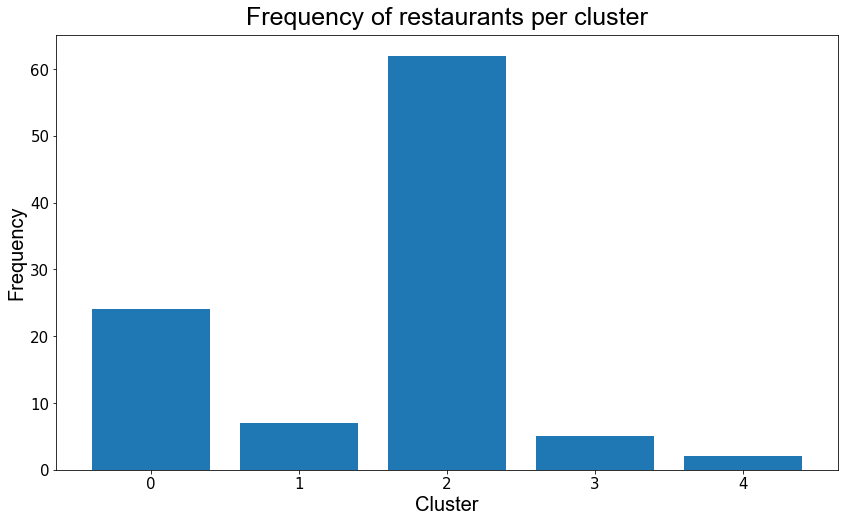

In [88]:
clusters = ['0','1','2','3','4']   #axis X     #clusters
frequency = [24,7,62, 5,2]   #axis Y   #number of resturant by cluster.

#x = np.arange(len(label))  # the label locations
width = 0.35  # the width of the bars

#figsize=(14,8)
fig, ax = plt.subplots(figsize=(14, 8))

ax.bar(clusters, frequency)

ax.set_title('Frequency of restaurants per cluster', fontname='Arial', fontsize=25, y=1.01)
ax.set_xlabel('Cluster', fontname='Arial', fontsize=20,  y=1.01)
ax.set_ylabel('Frequency', fontname='Arial', fontsize=20) 

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(15) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(15)

plt.show()


I calculated the score of the available places to rent to the Japanese restaurants that already exist and to public transportation. The lower score more optimal is the place. The results are shown in the figure below. 

In [89]:
#df_r.info()
#df_r.head()
df_r.describe()

,index,Postcode,Price,Latitude,Longitude,Score
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,10.000000,11808.333333,2051.255238,52.499874,13.381945,3876.263035
std,6.204837,1635.782422,2406.809748,0.027930,0.095382,4447.120865
min,0.000000,10115.000000,0.000000,52.446285,13.191231,748.154426
25%,5.000000,10713.000000,400.000000,52.480500,13.327373,1491.643158
50%,10.000000,12043.000000,1142.360000,52.501540,13.405483,2027.250023
75%,15.000000,12359.000000,2900.000000,52.516340,13.453565,4698.317841
max,20.000000,16727.000000,10000.000000,52.547630,13.559540,20580.636132


In [90]:
df_r = df_r.reset_index()  #reset index   

In [91]:
'''
Variables:
categorical nominal: address, postcode
quantitative continuous: price
categorical quantitative: distance
'''

'\nVariables:\ncategorical nominal: address, postcode\nquantitative continuous: price\ncategorical quantitative: distance\n'

In [92]:
# list(df_r.columns) #list columns names
list_postcode = df_r.Postcode.unique()   #liste vaules por Postcode
list_postcode

array([10115, 10119, 10713, 16727, 10719, 10247, 12043, 12053, 10435,
       10245, 10777, 10717, 10785, 13597, 13585, 12057, 13595, 12347,
       12359, 12683])

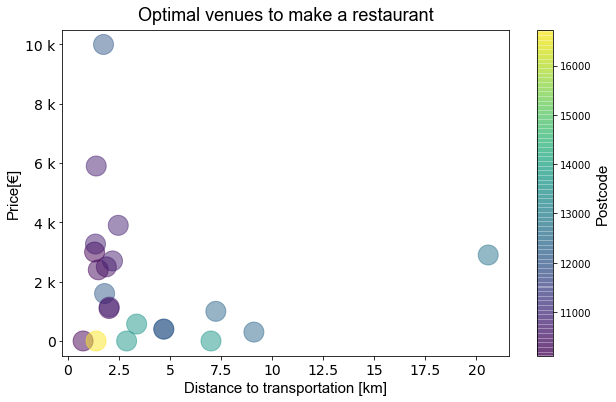

In [93]:
# Multivariable graph (price, distance to public transportation and Postcode). With a color bar.

x = df_r['Score']/1000  #defines x and transforms m in km
y = df_r['Price']
z = df_r['Postcode']

fig, ax = plt.subplots(figsize=(10,6))
scat = ax.scatter(x, y, c=z, s=400, marker='o',alpha=0.5)
cb = fig.colorbar(scat)

ax.set_title("Optimal venues to make a restaurant", fontname='Arial', fontsize=18, y=1.01)
ax.set_xlabel("Distance to transportation [km]", fontname="Arial", fontsize=15)
ax.set_ylabel("Price[€]", fontname="Arial", fontsize=15) 
plt.gca().xaxis.set_major_formatter(EngFormatter())
plt.gca().yaxis.set_major_formatter(EngFormatter())
cb.set_label('Postcode', fontname="Arial", fontsize=15)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)



I will explore the results now using the `Folium map`. In the Berlin map below is showing the locations of each cluster and each type of the restaurant. It is also showing in the figure the optimal places (yellow points) with the score label in each point and including the public transportation, the city train - s-Bahn (green points) and the metro - U-Bahn (blue points).

In [94]:
#berlin_map = folium.Map(location=[berlin_latitude, berlin_longitude], zoom_start=10)
# create map
map_clusters = folium.Map(location=[berlin_latitude, berlin_longitude], zoom_start=11)
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

places_rent = folium.map.FeatureGroup()

# add markers to the map
markers_colors = []
for lat, lon, name, cluster in zip(berlin_merged['lat'], berlin_merged['lng'],berlin_merged['categories'], berlin_merged['cluster_labels'] ):
    label = folium.Popup('Cluster ' + str(cluster) +': ' + str(name), parse_html=True)     
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
    
# add markers to map
for lat, lng, label in zip(df_r['Latitude'], df_r['Longitude'], df_r['Score'] ):
    #label = folium.Popup(label, parse_html=True)
    label = folium.Popup(str(label),  parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='yellow',
        fill_opacity=0.7,
        parse_html=False).add_to(map_clusters)
    
# add markers to map
for lat, lng, name in zip(df_s['lat'], df_s['lng'], df_s['name']):
    #label = folium.Popup(label, parse_html=True)
    label = folium.Popup(str(name),  parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='green',
        fill=True,
        fill_color='green',
        fill_opacity=0.1,
        parse_html=False).add_to(map_clusters) 
    
    # add markers to map
for lat, lng, name in zip(df_u['lat'], df_u['lng'], df_u['name']):
    #label = folium.Popup(label, parse_html=True)
    label = folium.Popup(str(name),  parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.1,
        parse_html=False).add_to(map_clusters) 

map_clusters

It could be interesting to increase the dataset with available places. Here it was used only one agency website to collect the data of available places in Berlin. 

## 6. Conclusions <a name="Results and discussions"></a>

In this data science project, I showed how to explore venues using Foursquare API and how to get latitudes and longitudes using Geocoder. I chose the Japanese restaurant category to explore Foursquare venues in the city of Berlin. 

I applied the Machine Learning algorithm K-means Clustering and I made segmentations of the types of Japanese restaurants. Therefore, It was possible to observe in the `Folium map` the locations of the restaurants in each of the clusters created. 

I collected prices of available places for opening a restaurant in Berlin and created a dataset. 

I calculated the score for locations that have a distance of approximately 300 m from Japanese restaurants that already exist and from public transportations, such as the city train and the metro of Berlin. In the end, I obtained the results of the optimal places to open a restaurant in Berlin.